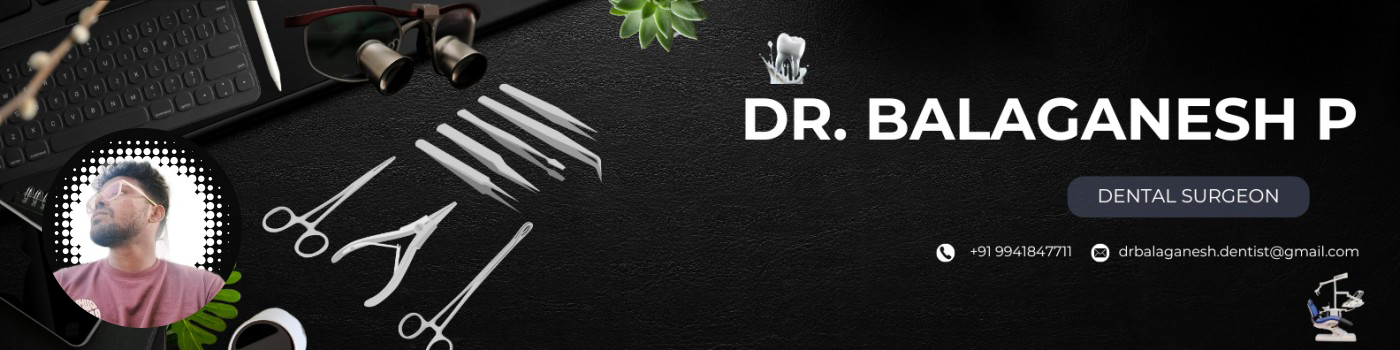

# **TRAIN YOLOV8 OBJECT DETECTION ON A CUSTOM DATASET (DIAGNOSING TMJ OSTEOARTHRITIS)**


---
**!! HI GUYS**



I am **Balaganesh**, currently a house surgeon at **Sri Venkateswara Dental College**. In this tutorial iam going to show you how to train YOLOV8 on custom dataset of **TMJ osteoarthritis**


**Before you start**, if you encounter any issues or have any doubts, feel free to ping me on any of the social media platforms listed below. You can also provide your requirements in my GitHub repository.


[![GMAIL](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:drbalaganesh.dentist@gmail.com)
[![INSTAGRAM](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/_bala.7601/)
[![LINKDIN](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/drbalaganeshdentist/)
[![GITHUB](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/DrDataScience-dentist/Automated-Diagnosis-of-TMJ-Osteoarthritis-Using-YOLO-BASED-DEEP-LEARNING-ALGORITHM)
---




## ⚠️ Disclaimer
I have created this notebook in [Kaggle](https://www.kaggle.com/) platform, I recommend to use kaggle for training this notebook snice it proivide 💪 **2 T4 GPU** but you can also use [Google Colab](https://colab.research.google.com/)

**REQUIREMENTS**
* LAPTOP OR PC
* DATASET
* [ROBOFLOW ACCOUNT](https://roboflow.com/)
* [KAGGLE](https://www.kaggle.com/) OR [COLAB](https://colab.research.google.com/)

**Use GPU Acceleration**
If you are running this notebook in Kaggle , navigate to `sidebar`  -> in the side bar search for  `session options` -> `accelerator` , set it to `GPU t4 x 2`, and then click `Turn on GPU T4 x 2`. This will ensure your notebook uses a GPU, which will significantly speed up model training times. In case of no side bar go to `View` -> `show sidebar`

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.


---

# STEP-1 DATASET-CREATION
Creating a custom dataset can be a time-consuming and challenging task, often requiring dozens or even hundreds of hours to gather images, label them, and export them in the correct format. Thankfully, Roboflow simplifies and accelerates this process significantly. Let me guide you through it!

**First create a Roboflow account**
<div align="center">
  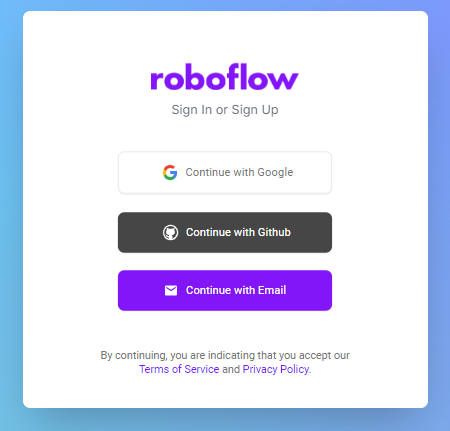
    
**Create workspace**
    
    
<div align="center">
  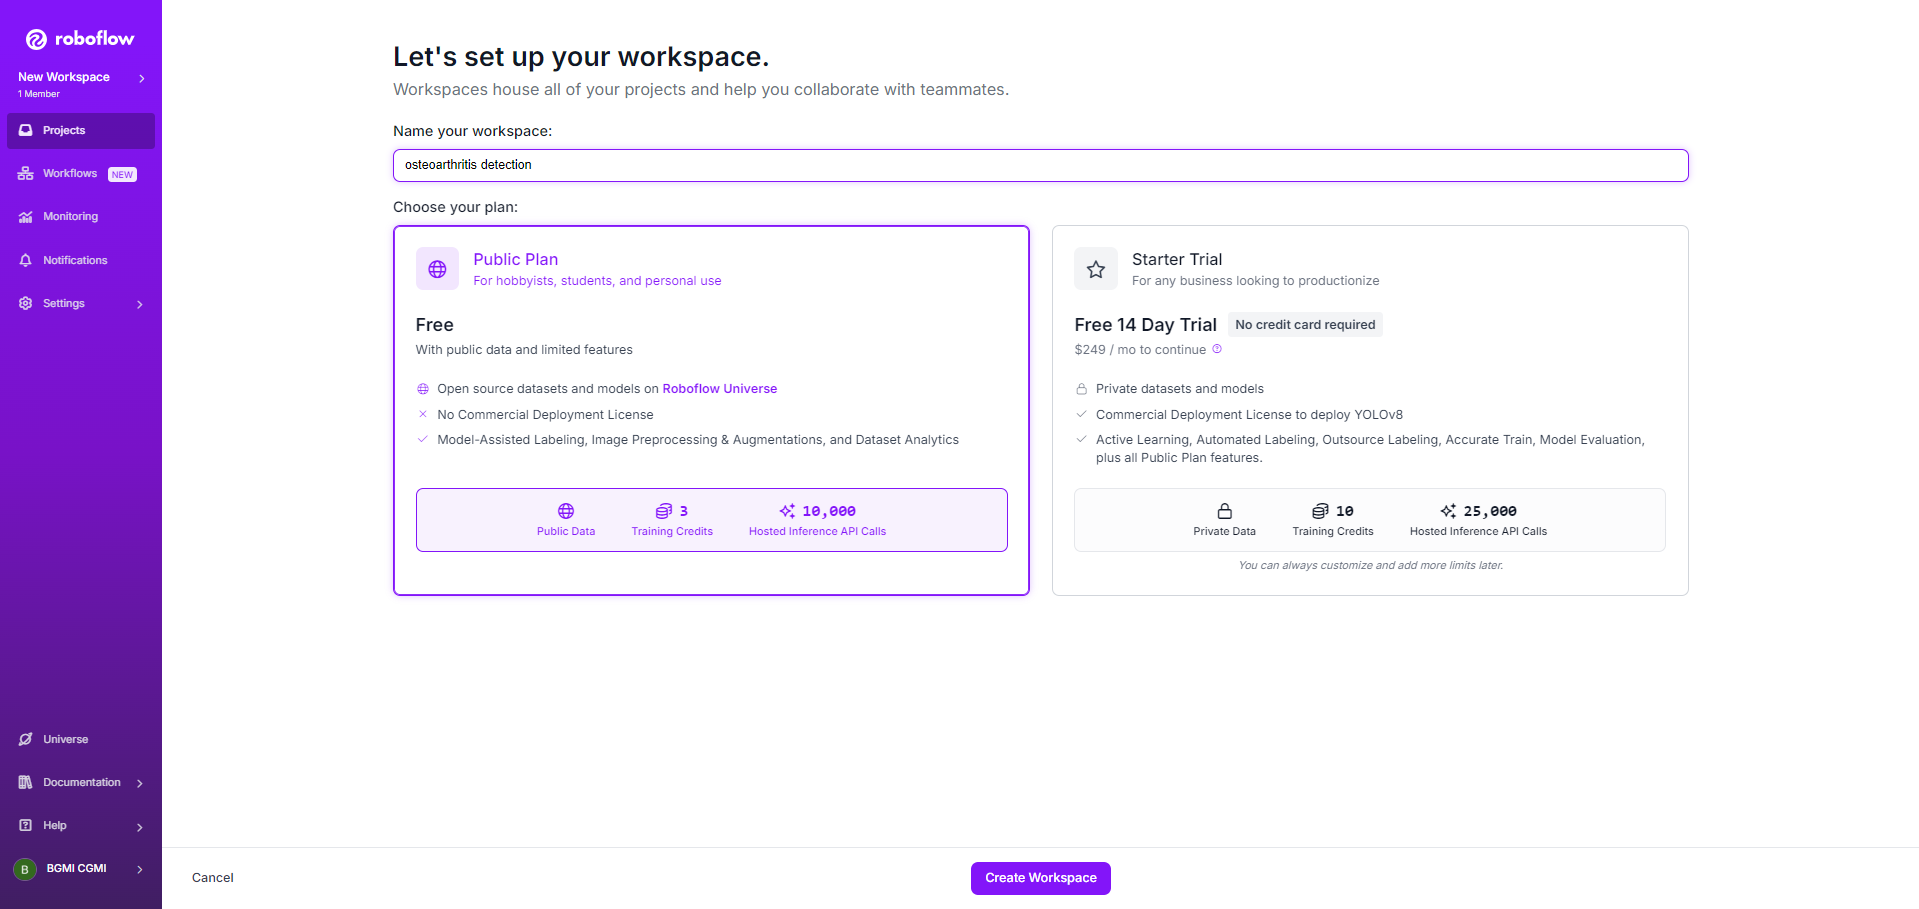
    
    
**Create Project**
    
    
<div align="center">
  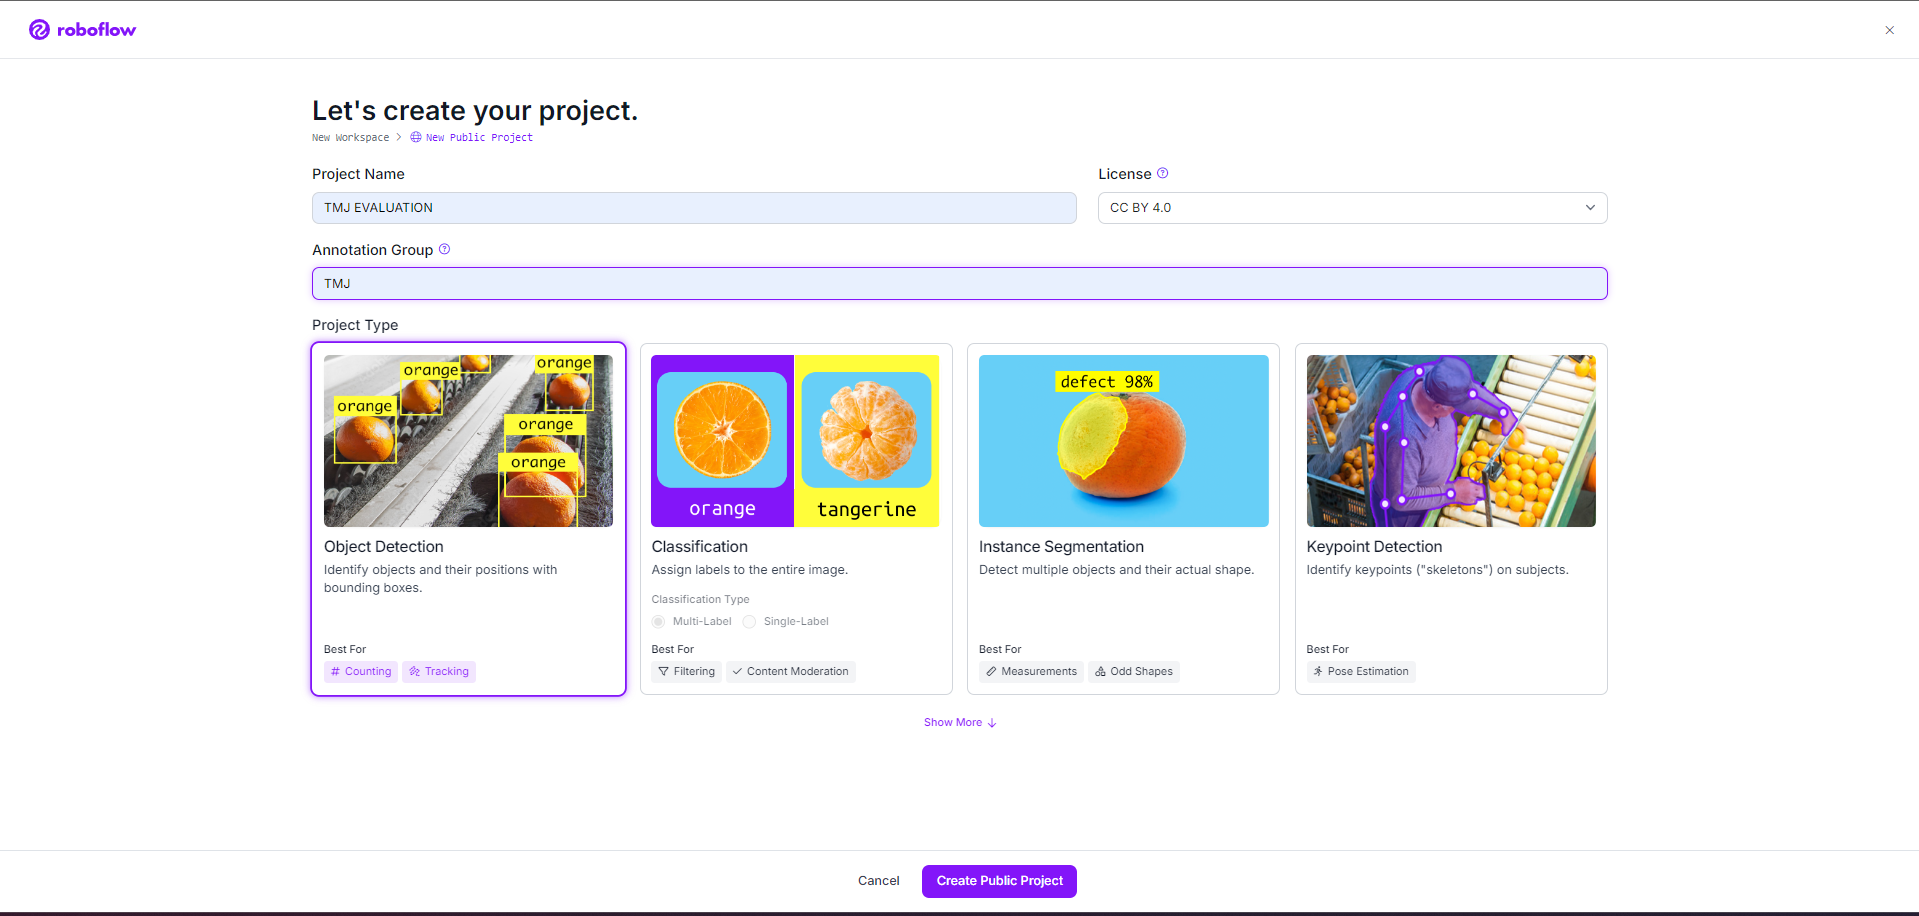
 
**Add class**
    
    
<div align="center">
  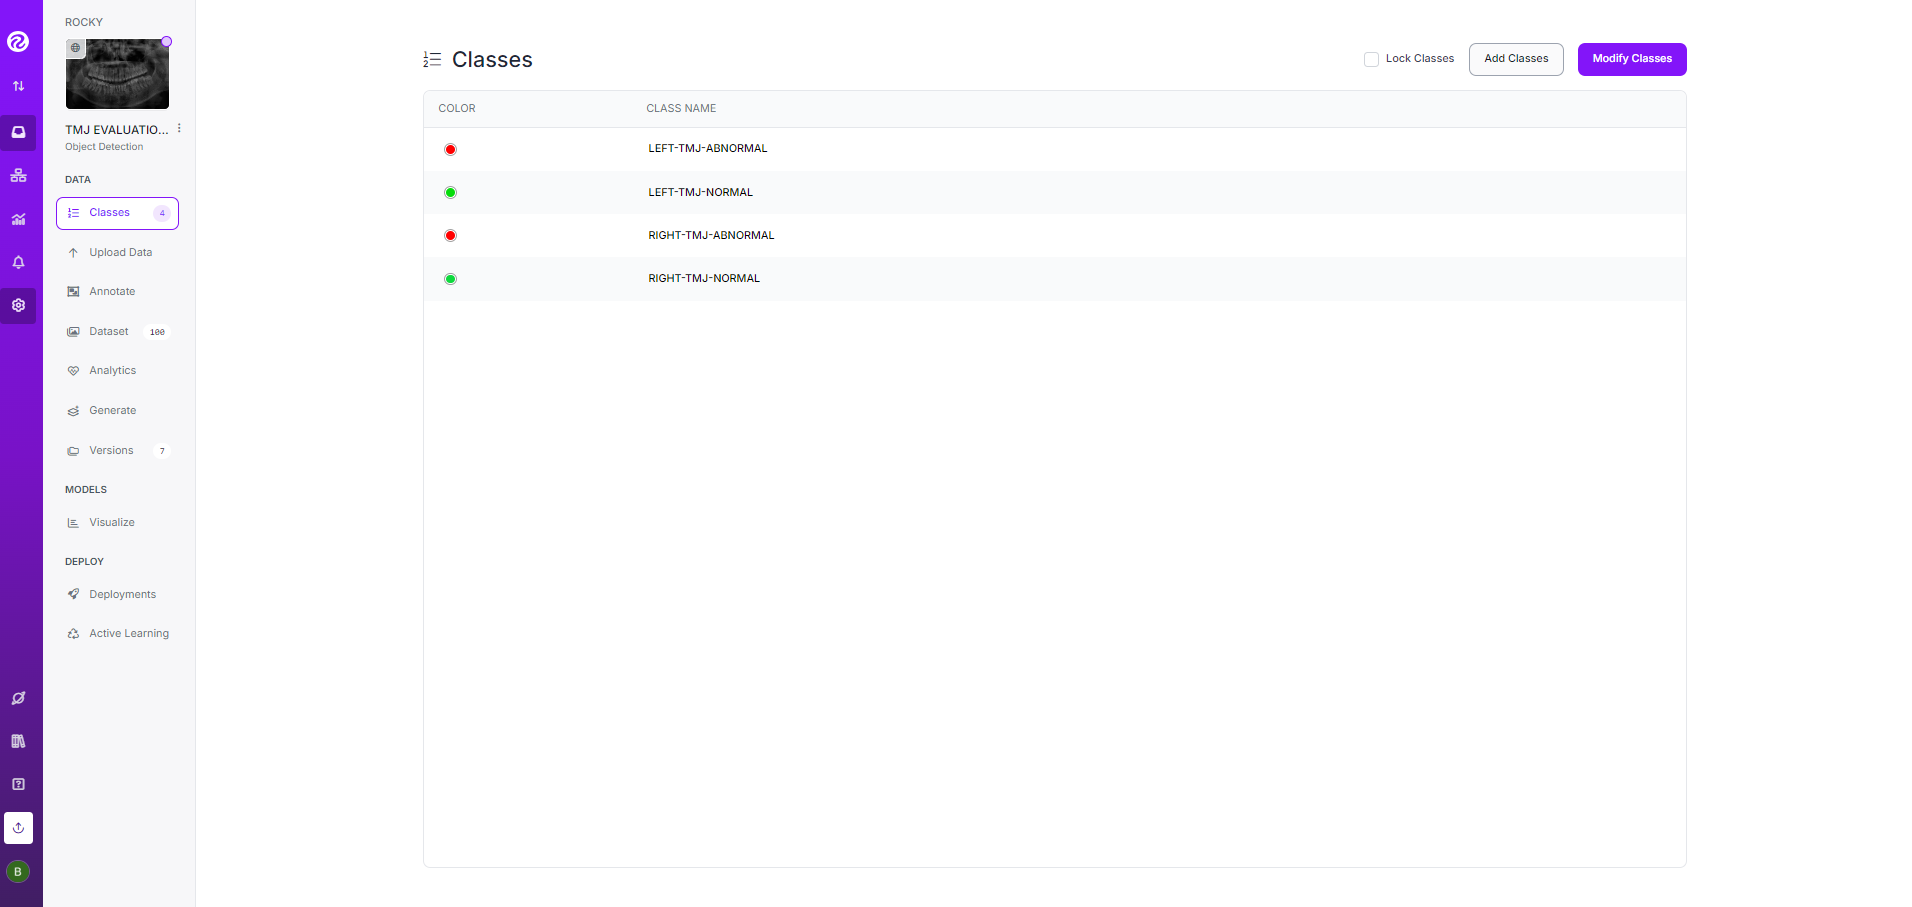
 
**Add images** by drag & drop or  add entire folder
    
    
<div align="center">
  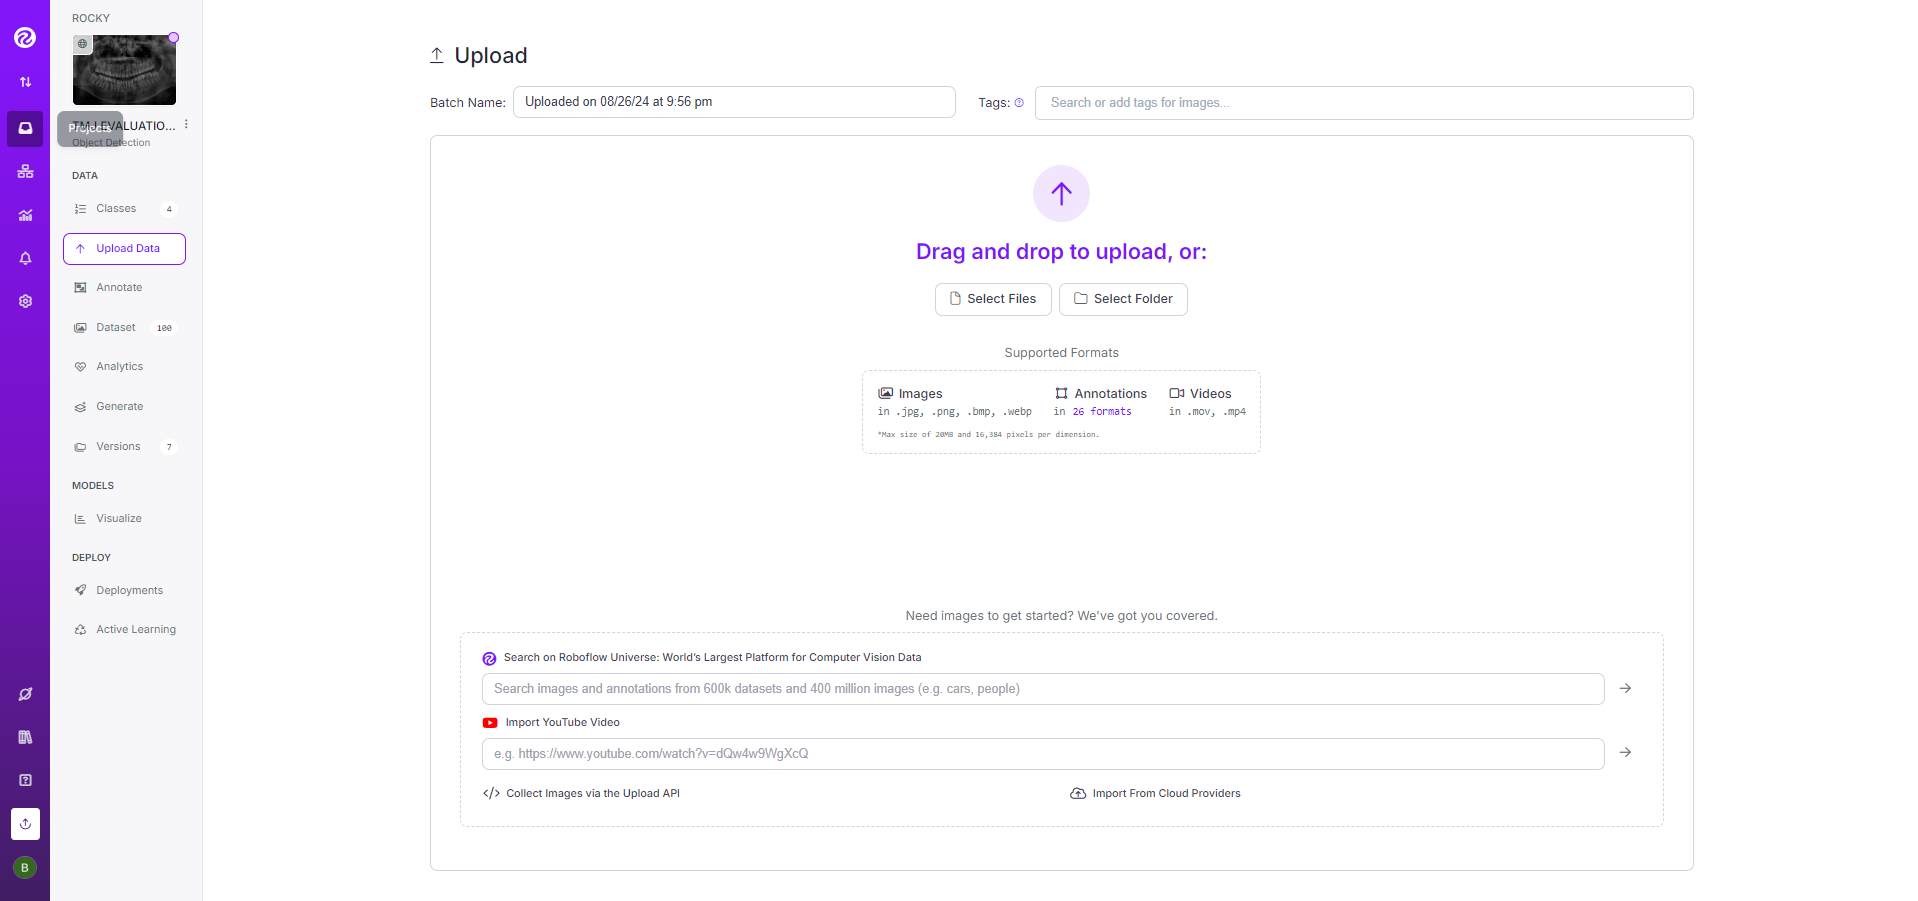
    
**Start annotating** use bounding box or polygon to annotate
    
    
<div align="center">
  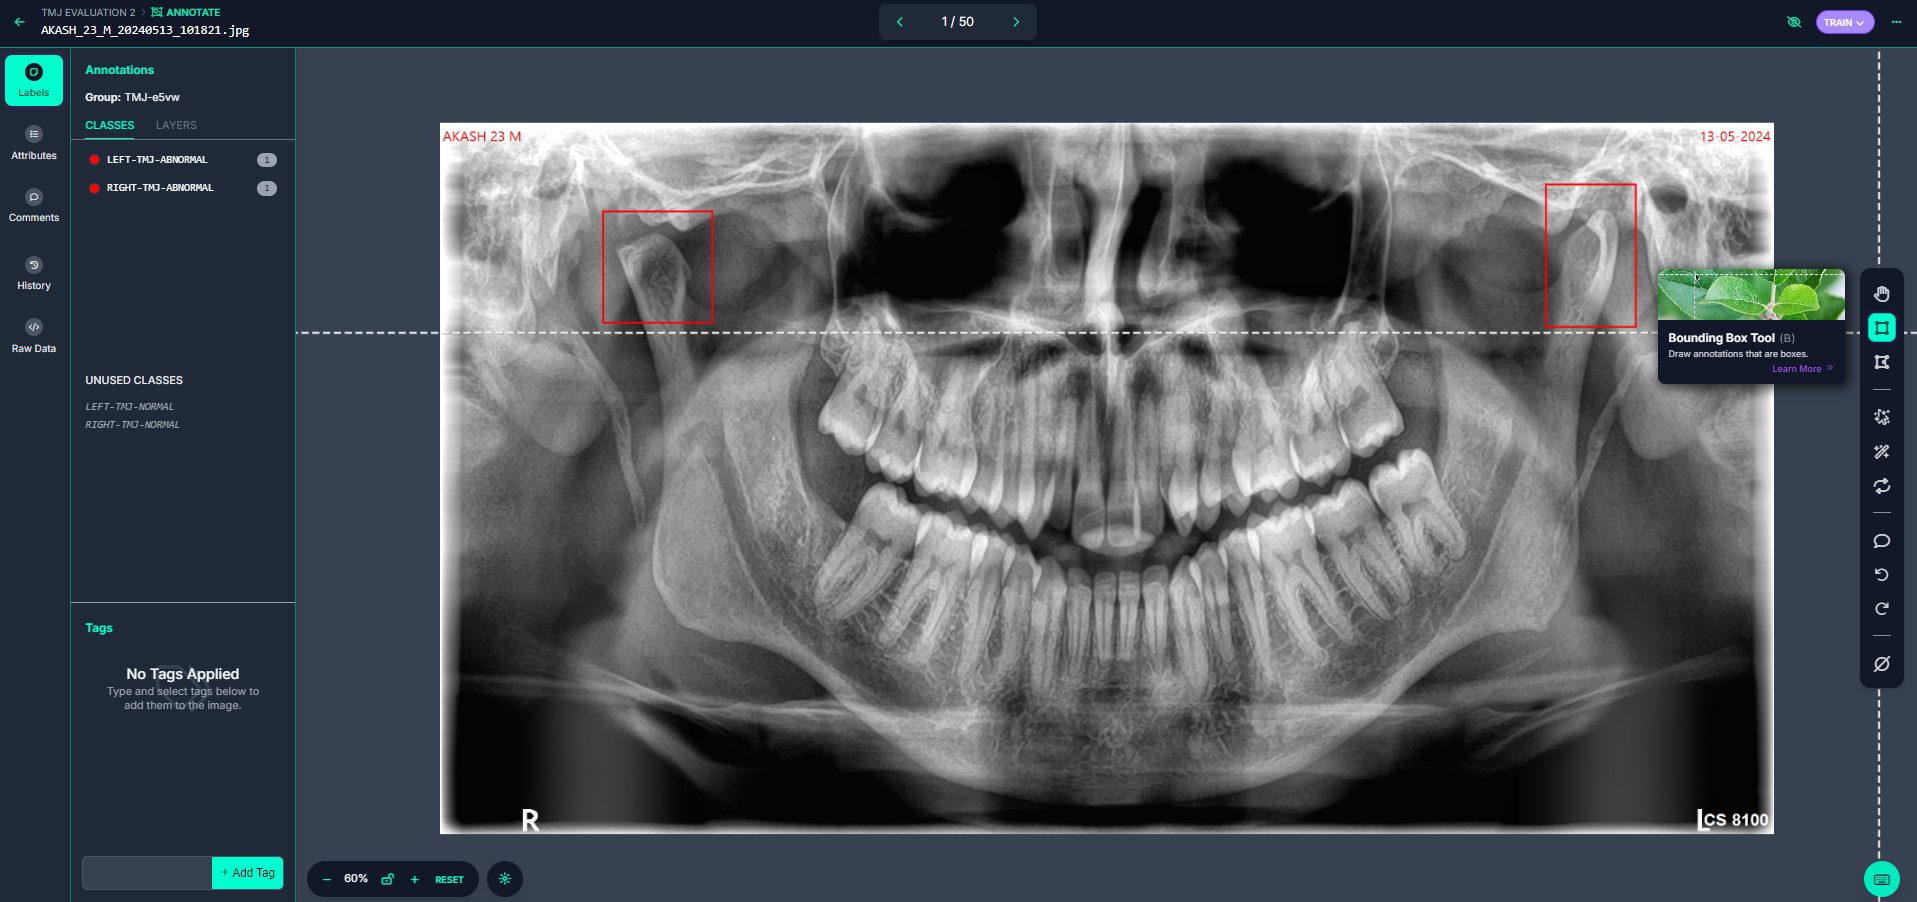    
 
**After annotation genrate dataset**
    Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.
    
    
<div align="center">
  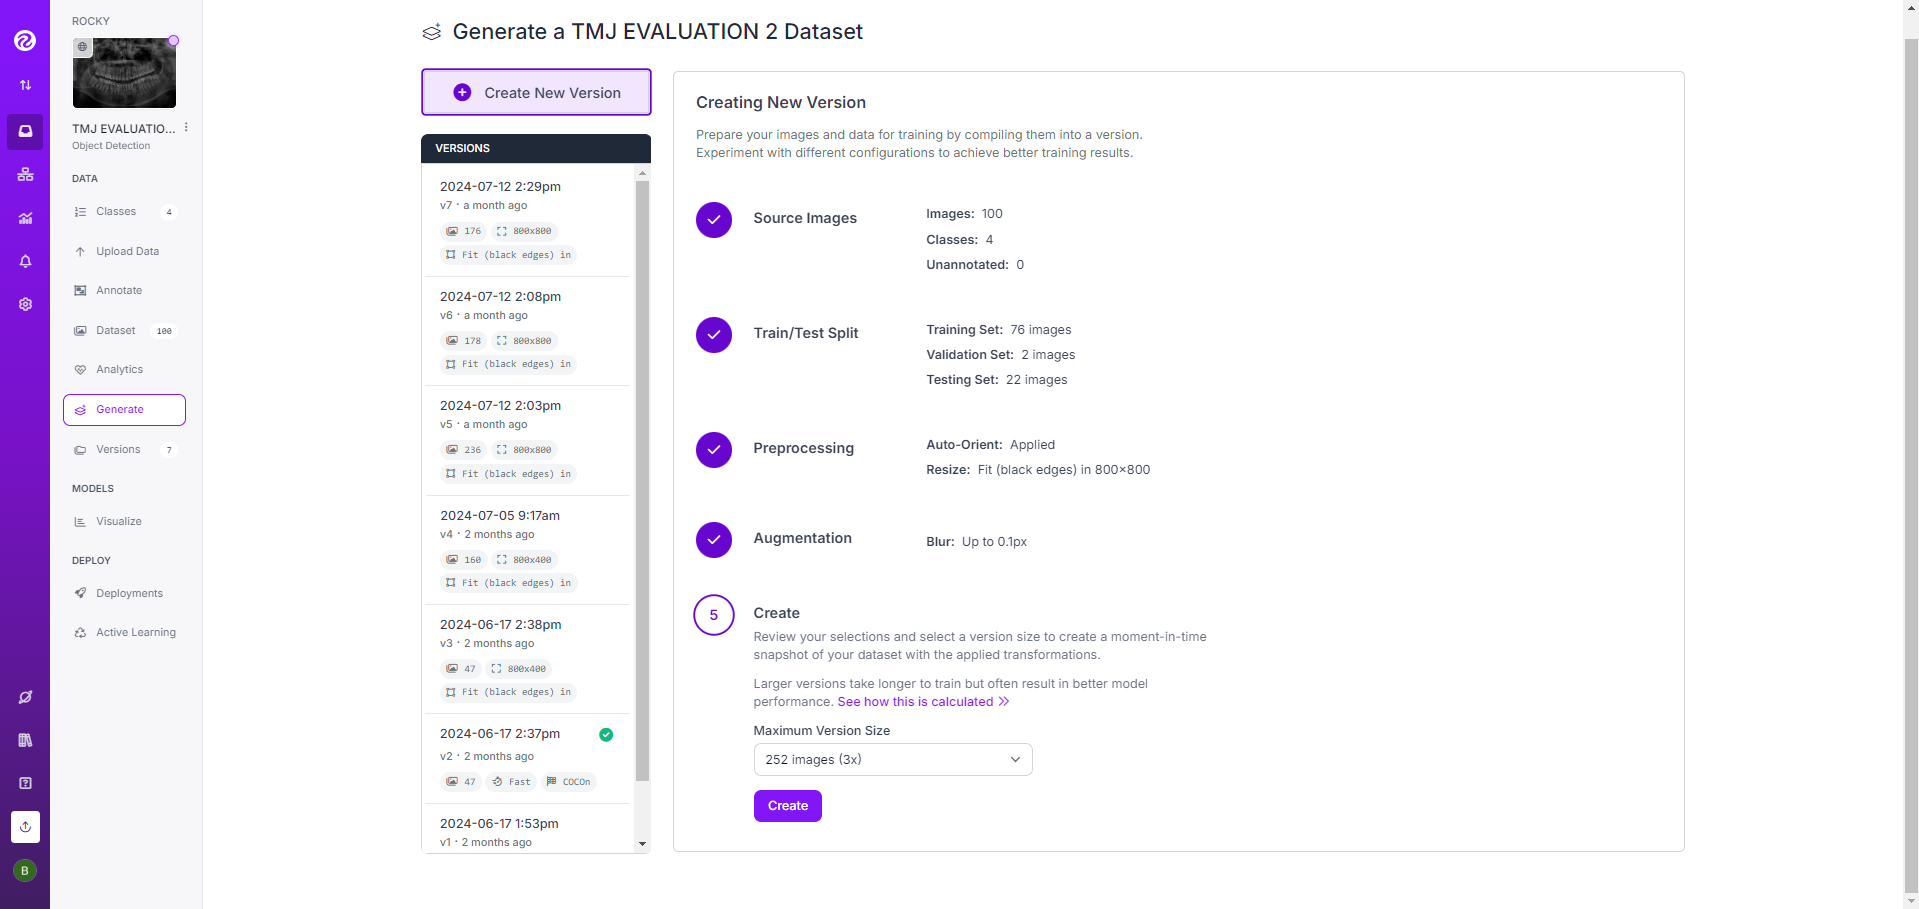 
 
**Exporting dataset**
  Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. copy below shown code which will be used later in this tutorial
    
<div align="center">
  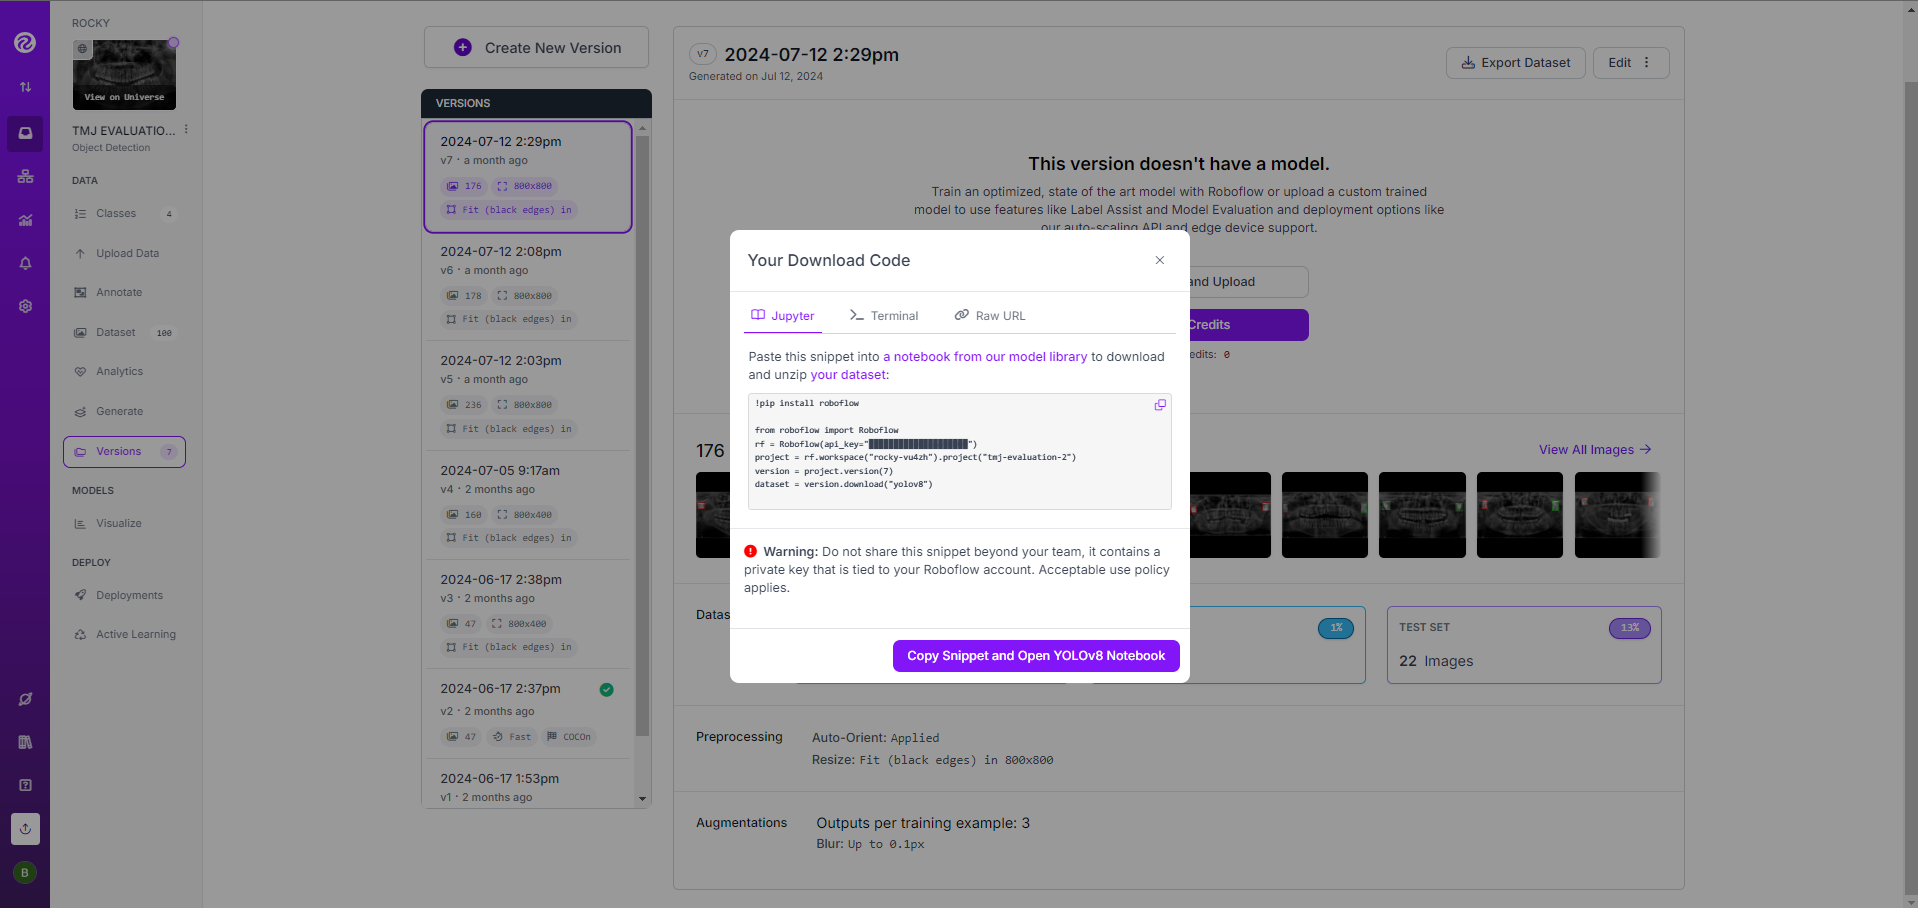
    
  ---

# STEP-2 INITIAL SETUP

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [1]:
!nvidia-smi

Mon Aug 26 16:48:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## SETUP-3 YOLOv8
The below mentioned code will install the yolo v8 in our virtual environment

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## SETUP-4 DOWNLOAD DATASET FROM ROBOFLOW UNIVERSE
paste the code below 👇 which is copied from roboflow export

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7rVgTtylSd0Xap4v8W0U")
project = rf.workspace("rocky-vu4zh").project("tmj-evaluation-2")
version = project.version(7)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 2.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TMJ-EVALUATION-2-7 in yolov8:: 100%|██████████| 364/364 [00:00<00:00, 5643.90it/s]


## SETUP-5 CUSTOM TRAINING


In [11]:
pip install --upgrade ray ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 22.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 41.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0
Note: you may need to restart the kernel to use updated packages.


**INITIALLY I SET EPOCH RATE TO 500** you can play with all the paramewters like epoch, imgszz learning rate etc


***delete device=0,1 in case of google colab***

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=500 imgsz=800 plots=True device=0,1

/kaggle/working
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/TMJ-EVALUATION-2-7/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

**Locate train output folderwill shown at end of above code execution** and change below path according to it **mine saved in /kaggle/working/runs/detect/train5 (for Google Colab it will be different)**

In [14]:
!ls {HOME}/runs/detect/train5/

F1_curve.png					   labels_correlogram.jpg
PR_curve.png					   results.csv
P_curve.png					   results.png
R_curve.png					   train_batch0.jpg
args.yaml					   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
confusion_matrix_normalized.png			   val_batch0_labels.jpg
events.out.tfevents.1724691816.6412768a8950.498.0  val_batch0_pred.jpg
labels.jpg					   weights


/kaggle/working


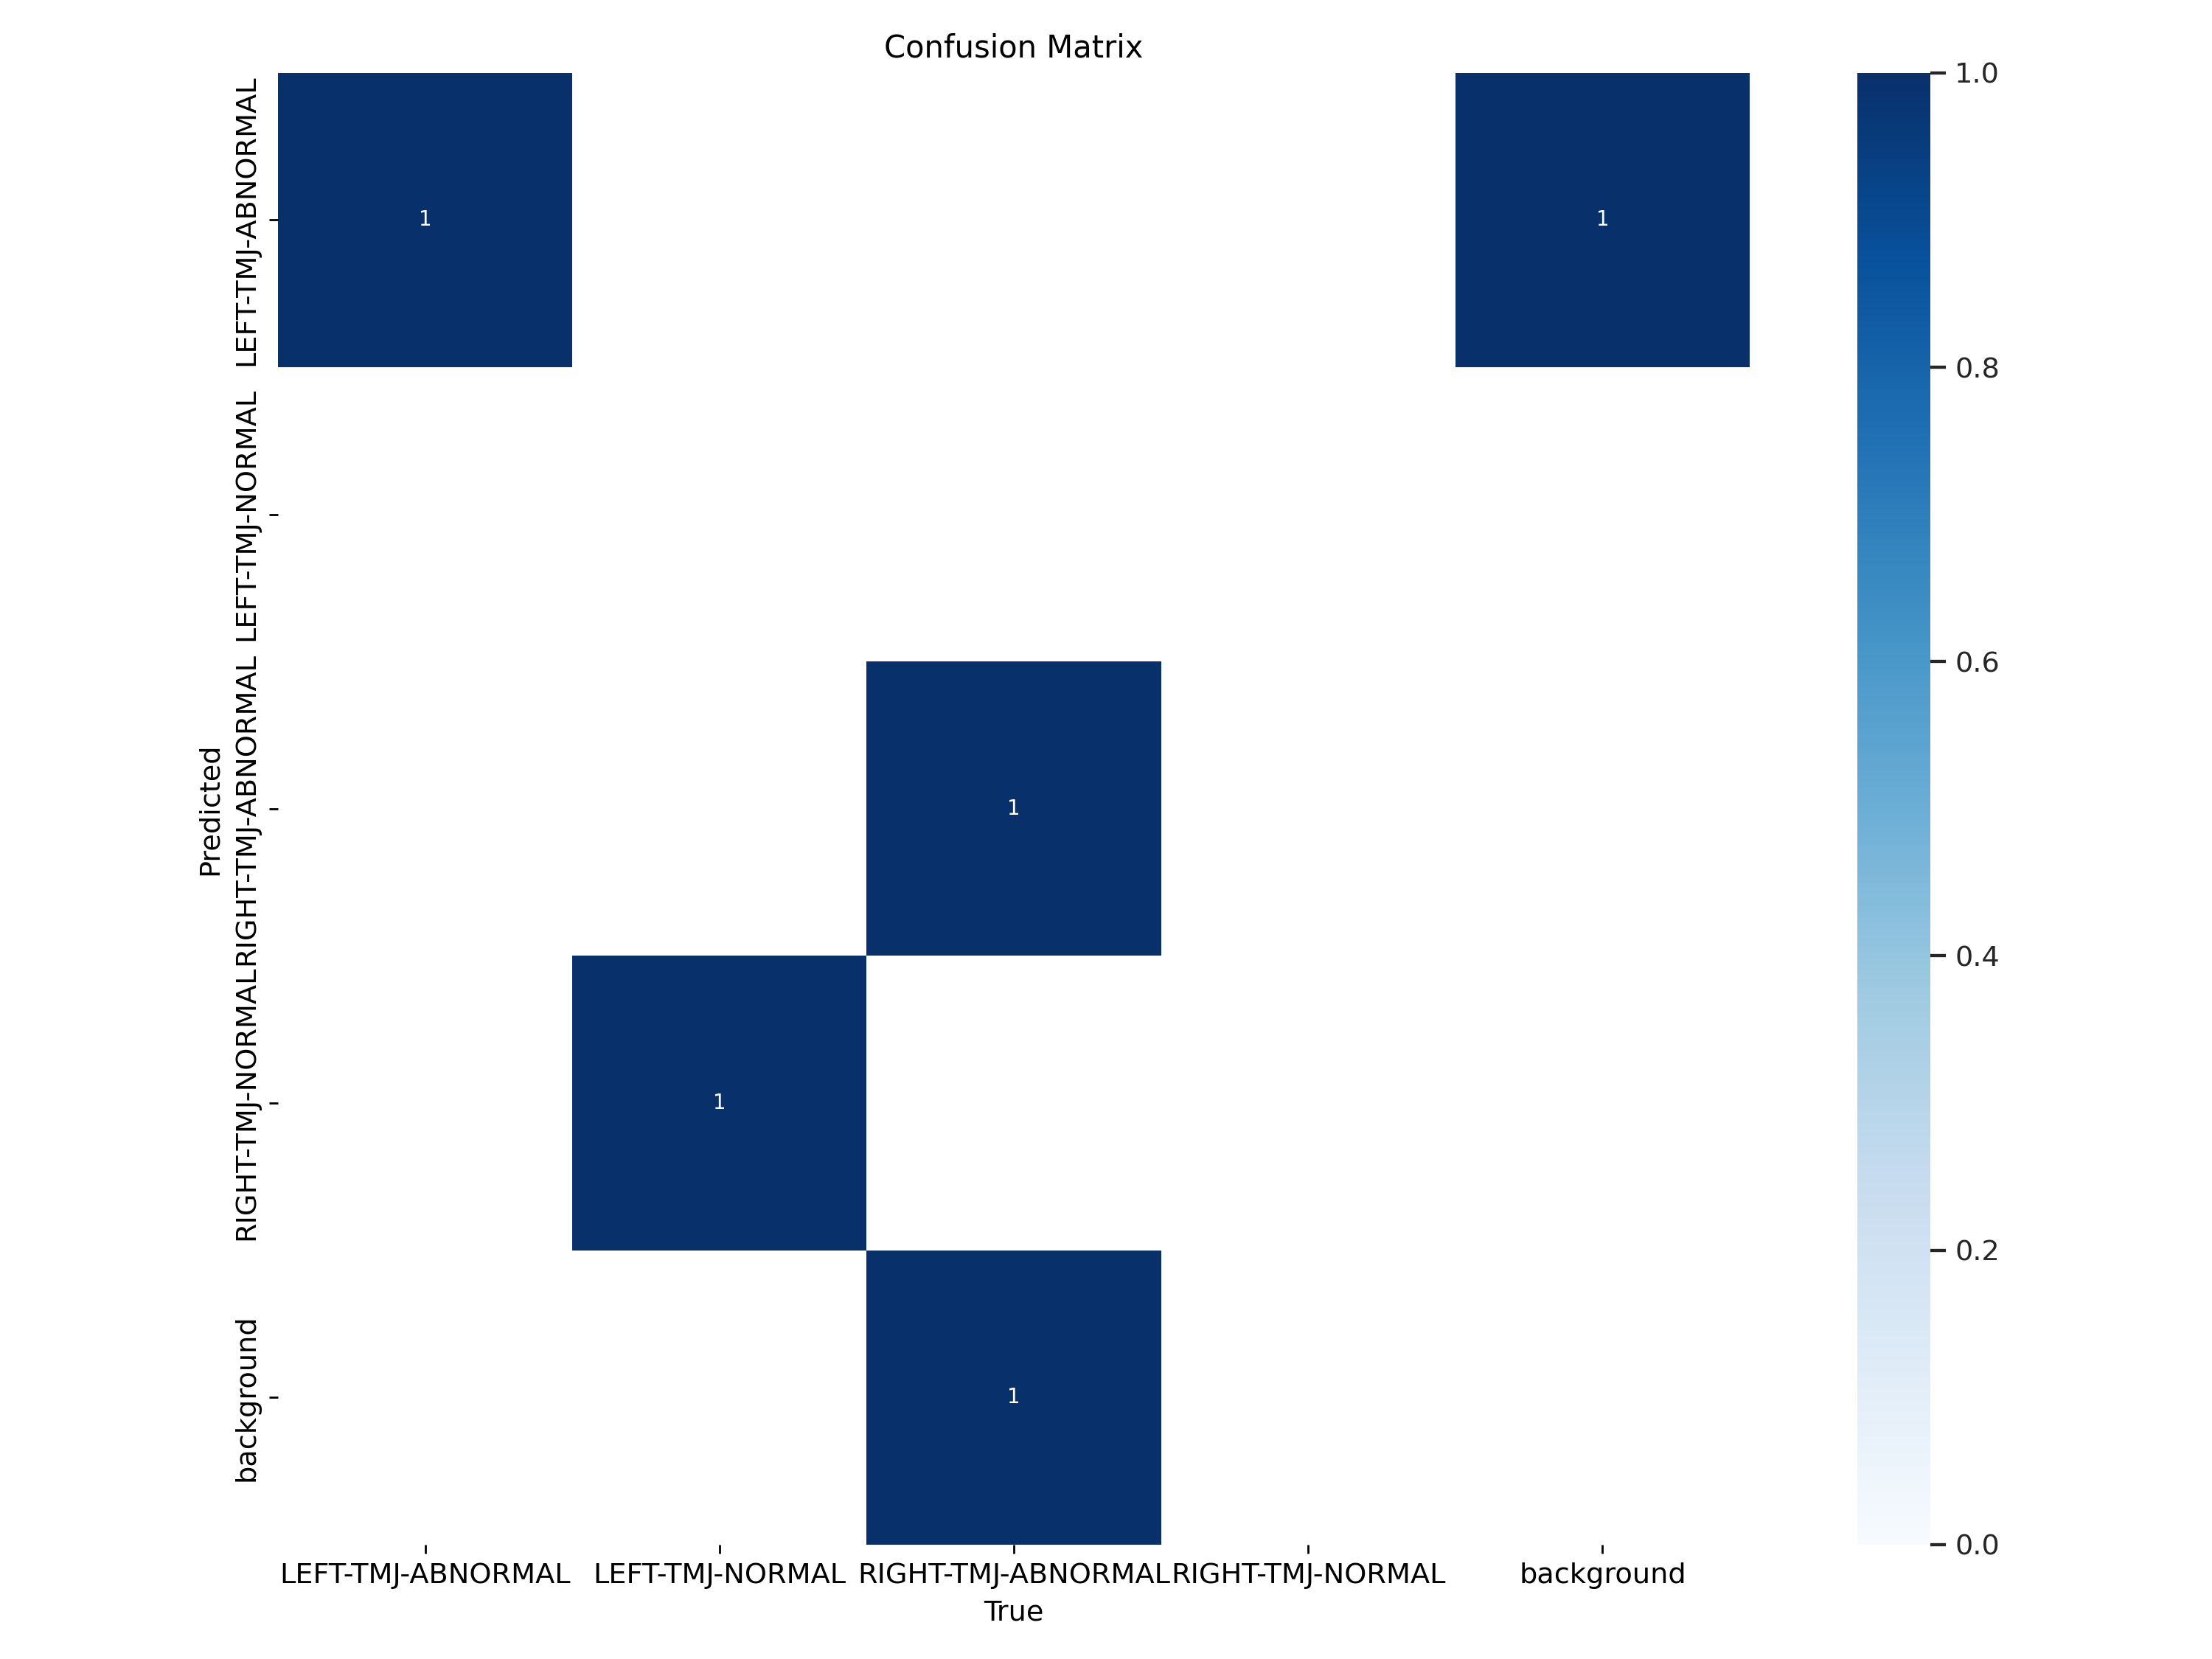

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/kaggle/working


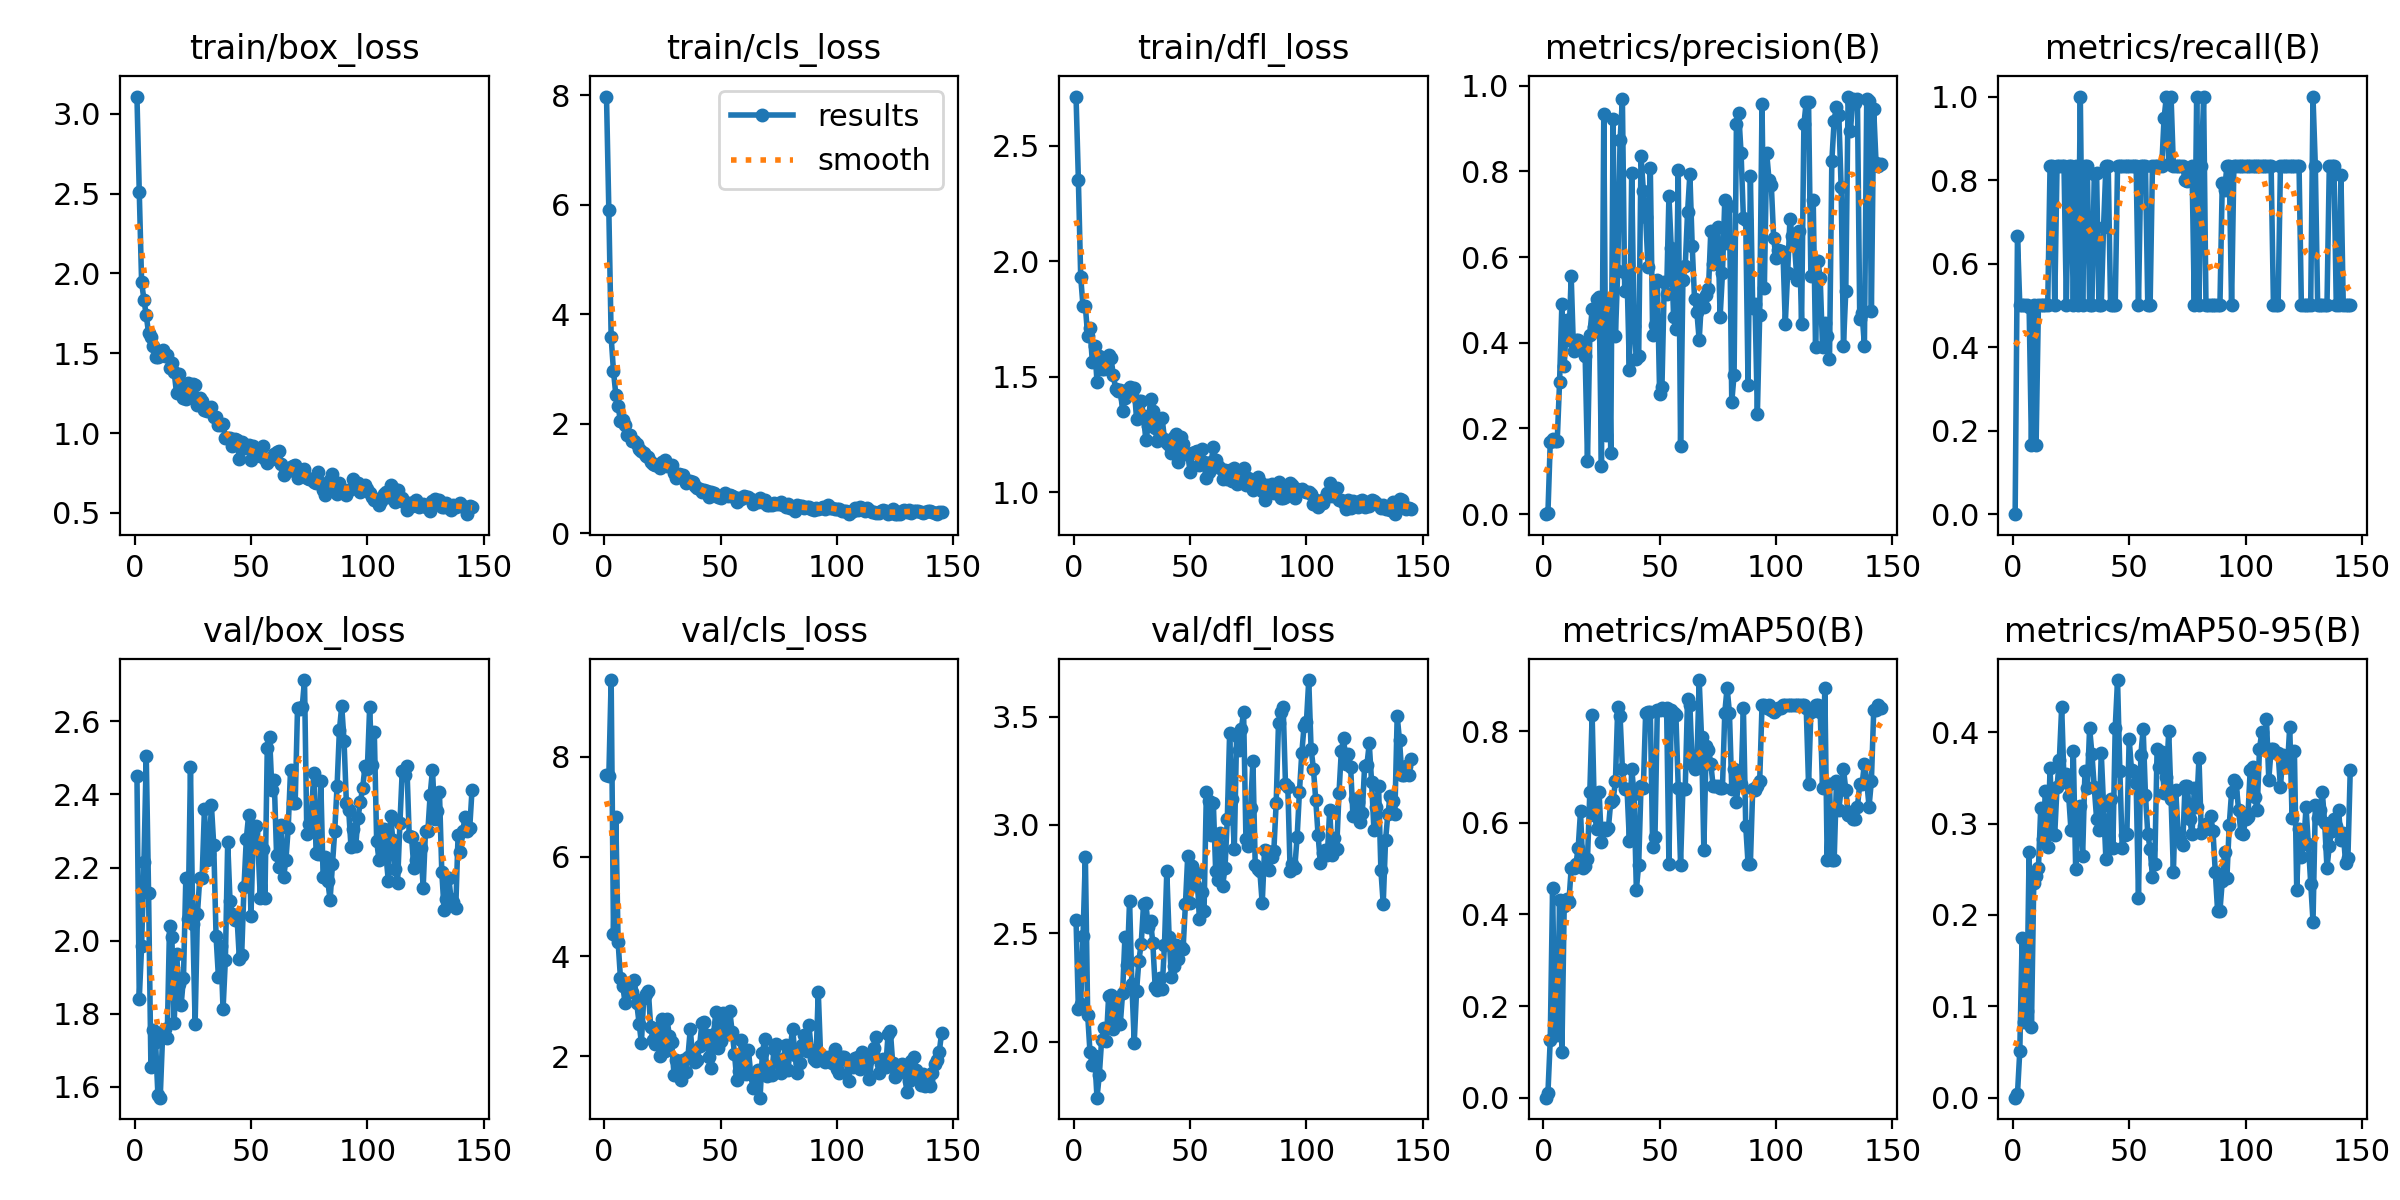

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/kaggle/working


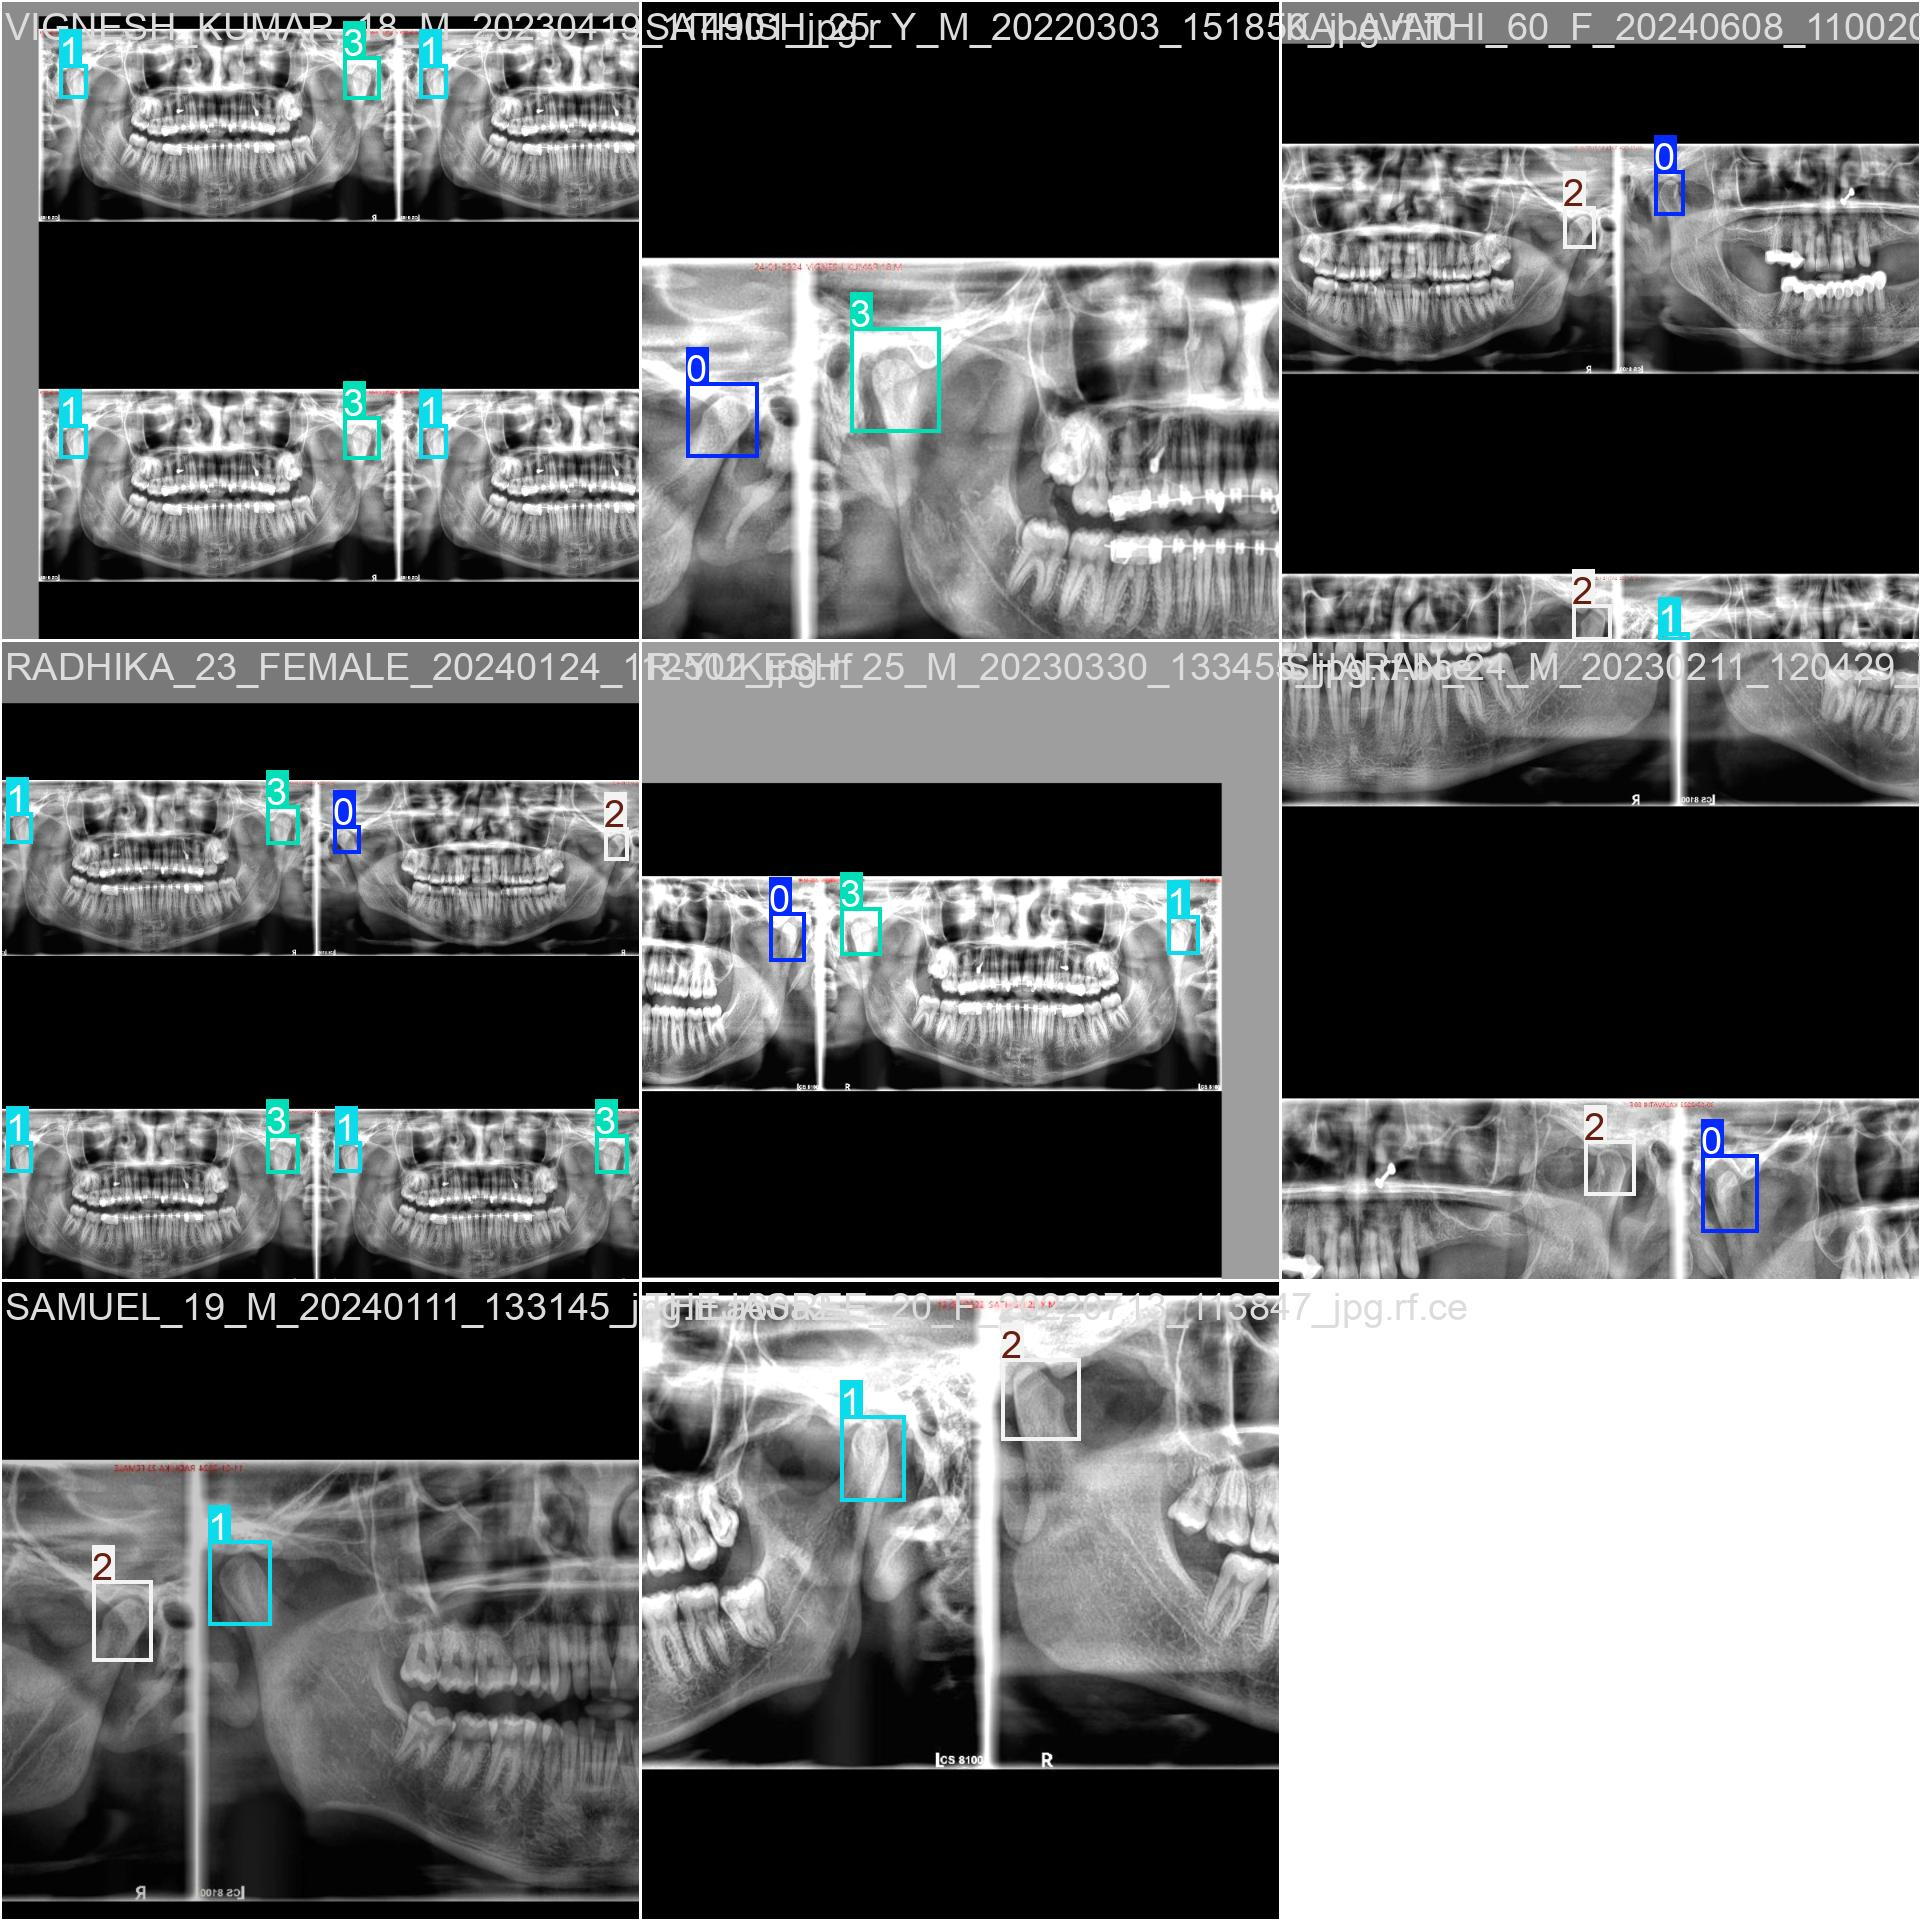

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/train_batch0.jpg', width=600)

## SETUP-5 VALIDATION


In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/TMJ-EVALUATION-2-7/valid/labels.cache... 2 images,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          2          4      0.577      0.833      0.842      0.457
     LEFT-TMJ-ABNORMAL          1          1      0.317          1      0.995      0.398
       LEFT-TMJ-NORMAL          1          1          1          1      0.995      0.597
    RIGHT-TMJ-ABNORMAL          2          2      0.414        0.5      0.537      0.376
Speed: 0.5ms preprocess, 29.2ms inference, 0.0ms loss, 78.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/22 /kaggle/working/TMJ-EVALUATION-2-7/test/images/ABHISHEK-G_14_M_20220720_123159_jpg.rf.7211f3d9d51514e5685a8104f6ffbbe7.jpg: 800x800 2 LEFT-TMJ-ABNORMALs, 22.9ms
image 2/22 /kaggle/working/TMJ-EVALUATION-2-7/test/images/ANANDHAN_23_M_20240502_125038_jpg.rf.2a5f454d2ef2412d6e5b1d6fc6e9ca27.jpg: 800x800 1 LEFT-TMJ-ABNORMAL, 22.9ms
image 3/22 /kaggle/working/TMJ-EVALUATION-2-7/test/images/BALASUBRAMANIA_22_M_20240511_121408_jpg.rf.d06720f2d70ac8a0062d1763cb0492f5.jpg: 800x800 (no detections), 22.8ms
image 4/22 /kaggle/working/TMJ-EVALUATION-2-7/test/images/CLARINDA__SUSAN_13Y__F_20220326_110308_jpg.rf.5234f16018283e9c62200c66648824ff.jpg: 800x800 5 LEFT-TMJ-ABNORMALs, 2 LEFT-TMJ-NORMALs, 22.8ms
image 5/22 /kaggle/working/TMJ-EVALUATION-2-7/test/images/D-_SRIDHARSHINI_13_F_20230311_121427_jpg.rf.46245d

## STEP-7 Deploy model on Roboflow
After training you can deploy model in roboflow universe

In [23]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train5/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/rocky-vu4zh/tmj-evaluation-2/7
Share your model with the world at: https://universe.roboflow.com/rocky-vu4zh/tmj-evaluation-2/model/7


# DONE! WE'VE LEARNED HOW TO TRANSFER LEARN A YOLO V8 MODEL FROM THIS TUTORIAL. FEEL FREE TO ASK QUESTIONS OR JOIN US FOR MORE INNOVATIONS IN DENTISTRY BY FOLLOWING ME ON INSTAGRAM AND LINKEDIN.

 BY BALAGANESH P

[![INSTAGRAM](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/_bala.7601/)
[![LINKDIN](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/drbalaganeshdentist/)





                                                                                                    